<a href="https://colab.research.google.com/github/vsemogutor/AI_examples/blob/main/Deploying_your%C2%A0models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.7 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import requests
import regex as re
import json

def search_images_ddg(key,max_n=200):
     """Search with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [ ]:
ufos_urls = search_images_ddg('UFO')
print(len(ufos_urls))
planes_urls = search_images_ddg('Airplane')
print(len(planes_urls))

176
181


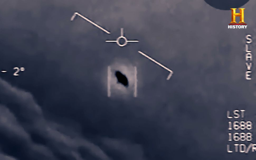

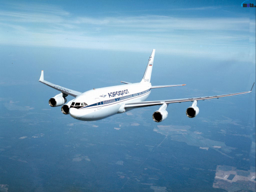

In [ ]:
from fastdownload import download_url

dest = 'images/UFO.jpg'
download_url(ufos_urls[0], dest)

im = Image.open(dest)
display(im.to_thumb(256,256))

dest = 'images/plane.jpg'
download_url(planes_urls[0], dest)

im = Image.open(dest)
display(im.to_thumb(256,256))

In [ ]:
root = Path("xfiles")
if not root.exists():
      root.mkdir()

def download(directory_name, urls):
  path = Path(root/directory_name)
  if not path.exists():
      path.mkdir()
  dest = path
  download_images(dest, urls=urls)

  fns = get_image_files(path)
  print(fns)

download('UFOs', ufos_urls)
download('Planes', planes_urls)

[Path('xfiles/UFOs/77271d7c-bfe7-408f-bd9c-e5ab3621dd73.jpg'), Path('xfiles/UFOs/07b0d46a-92f3-406d-a2e5-e2ca7a4873f6.jpg'), Path('xfiles/UFOs/699031b1-538f-4a38-8c8c-43f4dec19b1c.jpg'), Path('xfiles/UFOs/3dc55b02-73c2-4d5b-9ea5-9d6365b79656.jpg'), Path('xfiles/UFOs/09a3d0a8-2465-40e9-b908-603289b6ec70.jpg'), Path('xfiles/UFOs/133913cc-7405-4158-850d-cfbcdbc1d0c7.jpg'), Path('xfiles/UFOs/8cc3659f-53b9-4929-9c1b-168a808e8ed2.jpg'), Path('xfiles/UFOs/8045bf5e-f766-4a3c-9876-c574e696fce8.jpg'), Path('xfiles/UFOs/8215327c-85cf-464e-9a34-42a18bd631f4.jpeg'), Path('xfiles/UFOs/ca3bac42-af77-4b1c-806d-761e328de17a.jpg'), Path('xfiles/UFOs/f7ec2c47-ea2a-443d-8277-75a7f571bcb1.jpg'), Path('xfiles/UFOs/3629d165-96da-4fff-a989-b91cb707d839.jpg'), Path('xfiles/UFOs/58448f40-8f5f-4e2f-89d7-de8d637dd88b.jpg'), Path('xfiles/UFOs/3f3eb135-1478-4d65-bc73-d65423bf75ed.jpg'), Path('xfiles/UFOs/95e0e039-5d98-493a-bcd3-82923af12de0.jpg'), Path('xfiles/UFOs/8e89a4e7-2a50-4d27-a338-01f9105779a4.jpg'), Path('

In [ ]:
def verify(directory_name):
  fns = get_image_files(Path(root/directory_name))
  failed = verify_images(fns)
  print(f"Failed {directory_name} {len(failed)}")
  print(failed)

  failed.map(Path.unlink)
  failed.map(fns.remove)

verify('UFOs')
verify('Planes')

Failed UFOs 6
[Path('xfiles/UFOs/8215327c-85cf-464e-9a34-42a18bd631f4.jpeg'), Path('xfiles/UFOs/006fe491-b4c8-4dbe-b010-ed00878a3504.jpg'), Path('xfiles/UFOs/9dea75a3-4fcf-4092-baea-407e3813e778.jpeg'), Path('xfiles/UFOs/4b27ea53-ff09-40a5-816b-28c4ac7447a8.jpg'), Path('xfiles/UFOs/c4942973-5c5f-4ee6-8343-04858f206e41.jpg'), Path('xfiles/UFOs/45b1369a-4e27-4d7f-a2ed-6666b2793c91.png')]
Failed Planes 14
[Path('xfiles/Planes/74324fb2-deb6-4795-880c-0200568b9cf7.jpg'), Path('xfiles/Planes/5e42f2c5-c2e5-4995-a9c3-01ac8fc1bcec.jpg'), Path('xfiles/Planes/0806b9c7-72c3-43af-8945-f4a9c787d0fc.jpg'), Path('xfiles/Planes/66addf3e-135b-4cd7-832a-2fe5e3b6f9a2.jpg'), Path('xfiles/Planes/af0d84bf-1550-416e-9402-a67c09f55562.jpg'), Path('xfiles/Planes/c189203e-813e-4fff-a654-a37f6cd9d853.jpg'), Path('xfiles/Planes/88c1ed1d-3f66-4154-828e-675b87c12fbe.jpg'), Path('xfiles/Planes/5b2b4dbc-2854-4779-991d-0fb4c4f0e359.png'), Path('xfiles/Planes/2446be71-1107-4f75-95a3-49c8b026b229.jpg'), Path('xfiles/Plan

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


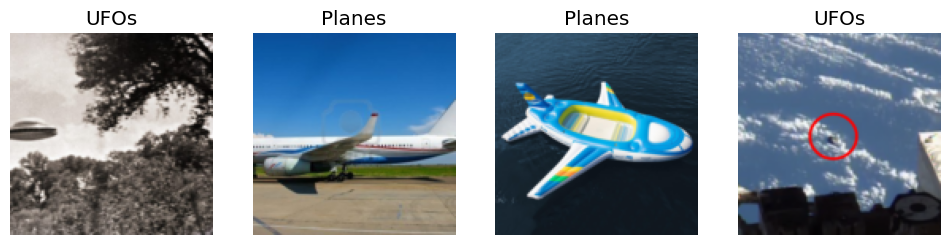

In [ ]:
ufos = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = ufos.dataloaders(root)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.209293,1.989611,0.428571,00:41


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.357056,0.836378,0.238095,00:45
1,0.272596,0.458702,0.174603,00:45
2,0.197311,0.406953,0.126984,00:44
3,0.149666,0.359859,0.111111,00:43


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


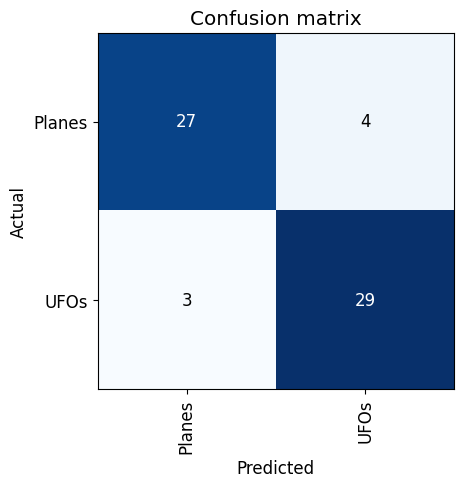

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

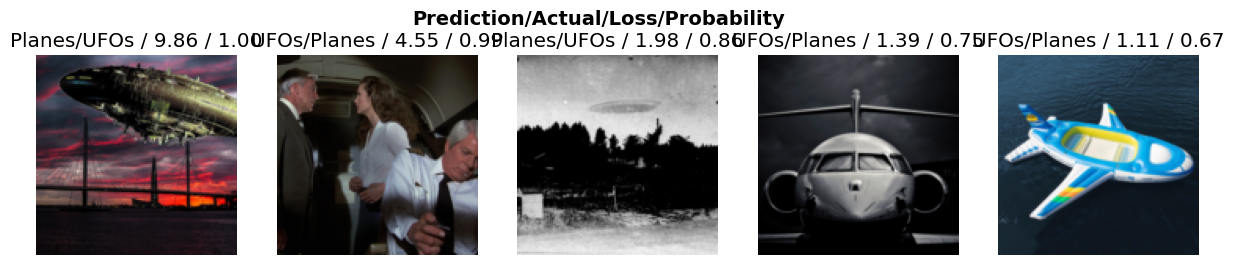

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()

btn_upload = widgets.FileUpload()

def on_upload_change(change):
    if len(btn_upload.data) > 0 :
      img = PILImage.create(btn_upload.data[-1])
      with out_pl: display(img.to_thumb(128,128))

btn_upload.observe(on_upload_change, names='_counter')


def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    print(learn.predict(img))


btn_run = widgets.Button(description='predict')
btn_run.on_click(on_click_classify)

VBox([widgets.Label('Test your image!'),
      btn_upload, btn_run, out_pl])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting un

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.4 OK
